In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv


In [10]:
import numpy as np    # Sayısal hesaplamalar ve veri manipülasyonu için kullanılır. Diziler ve çok boyutlu dizilerle çalışmayı kolaylaştırır. Hızlı ve verimli vektör operasyonları ve çeşitli matematiksel fonksiyonlar sağlar.

import pandas as pd   # Veri okuma, temizleme, analiz etme ve işleme için kullanılır.

import os             # Dosya ve dizin işlemlerini yapabilmek için kullanılır. Dosyaların bulunduğu dizini değiştirme veya mevcut dosyaları listeleme vb. Sistemle etkileşime geçip dosya yollarını yönetmenizi sağlar.

import seaborn as sns # İstatistiksel veri görselleştirmeleri yapar. Matplotlib üzerine kuruludur. Gelişmiş ve estetik grafikleri oluşturmanızı sağlar. Veri dağılımını, ilişkilerini ve kategorik verileri gösteren grafikler oluşturmak için kullanılır.

import matplotlib.pyplot as plt # Temel ve esnek veri görselleştirmeleri yapar.

import plotly.express as px # Etkileşimli ve dinamik grafikler oluşturur. Kullanıcıların grafiklerle etkileşime girmesini sağlayan güçlü bir araçtır. 3D grafikler, coğrafi haritalar ve hareketli grafikler gibi ileri seviye görselleştirmeleri destekler.


In [108]:
import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """
    Veri setine rastgele eksik değerler ekleyen fonksiyon.

    Bu fonksiyonu kullanabilmek için pandas, numpy ve random kütüphanelerini import ettim.

    Args:
        dataframe (pd.DataFrame): İşlenecek veri seti.
        missing_rate (float): Eksik veri oranı (0 ile 1 arasında bir değer). Varsayılan olarak %5 eksik değer ekler.

    Returns:
        df_missing (pd.DataFrame): İşlenmiş, eksik değerler eklenmiş veri seti.
    """
    # Orijinal veri setini bozmamak için bir kopyasını alıyorum
    df_missing = dataframe.copy()

    # Veri setinin toplam boyutunu ve eksik değerlerin sayısını hesaplıyorum
    df_size = dataframe.size  # Veri setindeki toplam hücre sayısını alıyorum
    num_missing = int(df_size * missing_rate)  # Eksik değer sayısını orana göre hesaplıyorum

    # Veri setinde rastgele satır ve sütun indeksleri seçerek bu hücrelere NaN değeri atıyorum
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)  # Rastgele bir satır seçiyorum
        col_idx = random.randint(0, dataframe.shape[1] - 1)  # Rastgele bir sütun seçiyorum

        # Seçilen hücreye NaN (eksik) değeri ekliyorum
        df_missing.iat[row_idx, col_idx] = np.nan

    # Eksik değerler eklenmiş veri setini geri döndürüyorum
    return df_missing


In [110]:
df = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")


In [111]:
# Eksik verileri tespit etmek
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [15]:
df.info()
# Veri çerçevesi hakkında daha detaylı bilgiler sunar.
#Her sütunun veri tipi, veri tiplerinin sayısal dağılımı, bellek kullanımı, eksik değerler ve sütunların ve satırların kaç olduğu bilgisini görürüz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


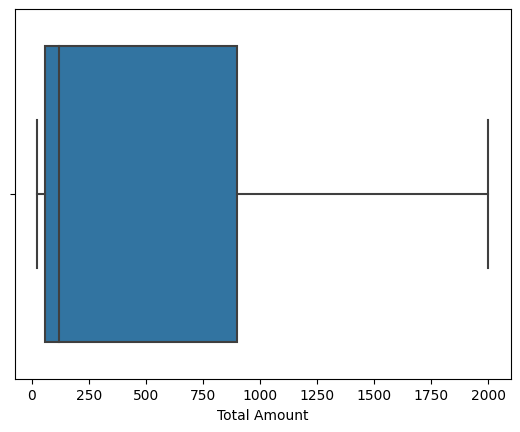

In [96]:
# Boxplot ile aykırı değerlerin tespiti
sns.boxplot(x=df['Total Amount'])
plt.show()


In [99]:
# Çift kayıtları kontrol etme
df.duplicated().sum()

# Çift kayıtları kaldırma
df = df.drop_duplicates()


In [98]:
# Date sütununu datetime formatına dönüştürmek
df['Date'] = pd.to_datetime(df['Date'])


In [100]:
# Veri türlerini kontrol etme
df.dtypes

# Gerekirse veri türünü değiştirme
df['Total Amount'] = df['Total Amount'].astype(float)


In [101]:
# Kategorik veriyi sayısal verilere dönüştürme
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [102]:
df.columns #Pandas'ta bir veri çerçevesinin sütun etiketlerine erişim sağlayan bir özniteliktir.
           #DataFrame'deki sütunların adlarını temsil eden bir Index döndürür.

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Z-Score', 'Age Group'],
      dtype='object')

In [114]:
df.head(5) #Bu fonksiyon, DataFrame'in ilk 5 satırını gösterir. Ancak, içine bir sayı parametresi verirseniz, o kadar satır döndürür.

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [104]:
df.tail(10) #Veri setinin varsayılan olarak son 5 satırını getirebilirdik fakan biz df.tail(10) ile son 10 satıra baktık.

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Z-Score,Age Group
990,991,2023-12-26,CUST991,1.0,34.0,Clothing,2,50,100.0,-0.635717,31-40
991,992,2023-08-21,CUST992,1.0,57.0,Electronics,2,30,60.0,-0.707146,51-60
992,993,2023-02-06,CUST993,1.0,48.0,Electronics,3,50,150.0,-0.546431,41-50
993,994,2023-12-18,CUST994,1.0,51.0,Beauty,2,500,1000.0,0.971433,51-60
994,995,2023-04-30,CUST995,1.0,41.0,Clothing,1,30,30.0,-0.760718,41-50
995,996,2023-05-16,CUST996,0.0,62.0,Clothing,1,50,50.0,-0.725003,61-70
996,997,2023-11-17,CUST997,0.0,52.0,Beauty,3,30,90.0,-0.653574,51-60
997,998,2023-10-29,CUST998,1.0,23.0,Beauty,4,25,100.0,-0.635717,18-30
998,999,2023-12-05,CUST999,1.0,36.0,Electronics,3,50,150.0,-0.546431,31-40
999,1000,2023-04-12,CUST1000,0.0,47.0,Electronics,4,30,120.0,-0.600003,41-50


In [105]:
df.describe()
#count: Sütundaki non-null (boş olmayan) değerlerin sayısı.
#mean: Sütundaki değerlerin ortalaması.
#std: Sütundaki değerlerin standart sapması.
#min: Sütundaki en küçük değer.
#25%: Alt çeyrek yüzdesi, sütundaki değerlerin %25'inin altında olan değer.
#50%: Medyan veya ortanca, sütundaki değerlerin yarısından küçük ve yarısından büyük olan değer.
#75%: Üst çeyrek yüzdesi, sütundaki değerlerin %75'inin altında olan değer.
#max: Sütundaki en büyük değer.

,Transaction ID,Date,Gender,Age,Quantity,Price per Unit,Total Amount,Z-Score
count,1000.000000,1000,995.000000,1000.000000,1000.000000,1000.000000,995.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,0.511558,41.378894,2.514000,179.890000,455.376884,0.000000
min,1.000000,2023-01-01 00:00:00,0.000000,18.000000,1.000000,25.000000,25.000000,-0.769646
25%,250.750000,2023-04-08 00:00:00,0.000000,29.000000,1.000000,30.000000,60.000000,-0.707146
50%,500.500000,2023-06-29 12:00:00,1.000000,42.000000,3.000000,50.000000,120.000000,-0.573217
75%,750.250000,2023-10-04 00:00:00,1.000000,53.000000,4.000000,300.000000,900.000000,0.792860
max,1000.000000,2024-01-01 00:00:00,1.000000,64.000000,4.000000,500.000000,2000.000000,2.757155
std,288.819436,NaN,0.500118,13.638334,1.132734,189.681356,558.970637,1.000000


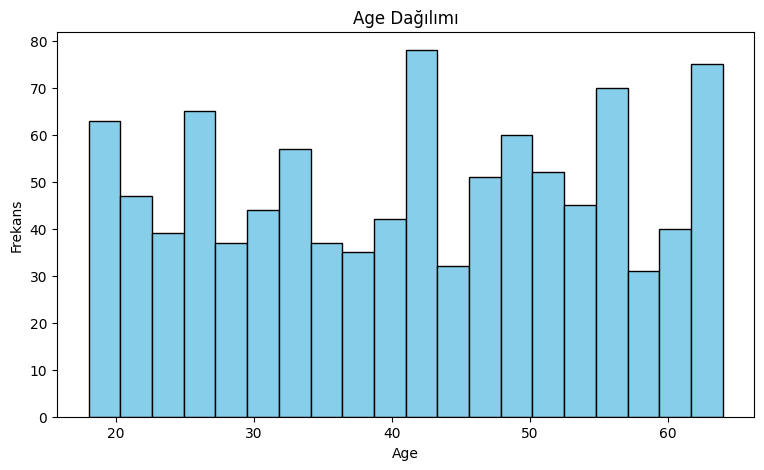

In [125]:
import matplotlib.pyplot as plt


def plot_hist(variable):
    # Verinin sayısal olup olmadığını kontrol et
    if not pd.api.types.is_numeric_dtype(df[variable]):
        print(f"{variable} sayısal bir değişken değil.")
        return

    # NaN değerlerini kontrol et ve varsa kaldır
    if df[variable].isnull().sum() > 0:
        print(f"{variable} değişkeninde eksik veriler var. NaN değerleri kaldırılıyor.")
        data = df.dropna(subset=[variable])
    else:
        data = df

    # Histogramı çiz
    plt.figure(figsize=(9, 5))  # Grafik boyutu
    plt.hist(data[variable], bins=20, color='skyblue', edgecolor='black')  # Histogram
    plt.xlabel(variable)  # X ekseni etiketi
    plt.ylabel("Frekans")  # Y ekseni etiketi
    plt.title(f"{variable} Dağılımı")  # Başlık
    plt.show()

# Histogramı çizmek için Age sütununu seçiyoruz
plot_hist('Age')


In [126]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


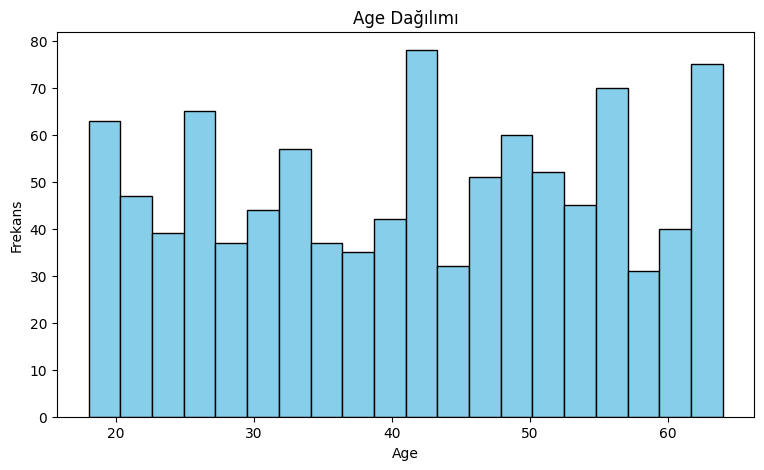

In [127]:
plot_hist('Age')


In [129]:
def plot_hist(variable):
    plt.figure(figsize = (9,5))  # Boyutları belirliyoruz
    # NaN değerlerini çıkararak histogramı çiziyoruz
    plt.hist(df[variable].dropna(), bins = 10, color='skyblue', edgecolor='black') 
    plt.xlabel(variable)
    plt.ylabel("Frekans")
    plt.title("{} Histogramı".format(variable))
    plt.show()


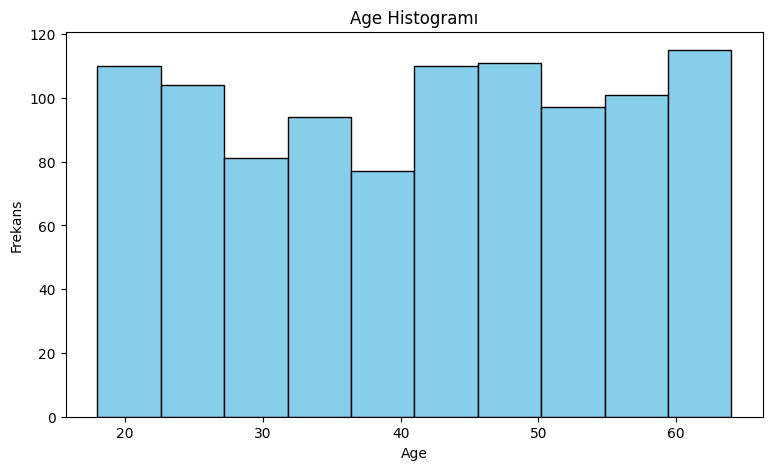

In [33]:
plot_hist('Age')

In [137]:
def plot_gender_age_hist():
    plt.figure(figsize=(10,6))  # Grafik boyutunu ayarlıyoruz
    # Yaş verilerini cinsiyete göre gruplayıp histogramı çiziyoruz
    sns.histplot(data=df, x="Age", hue="Gender", kde=True, bins=20, palette="Set1")
    plt.title("Yaş Dağılımı Cinsiyete Göre")
    plt.xlabel("Yaş")
    plt.ylabel("Frekans")
    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

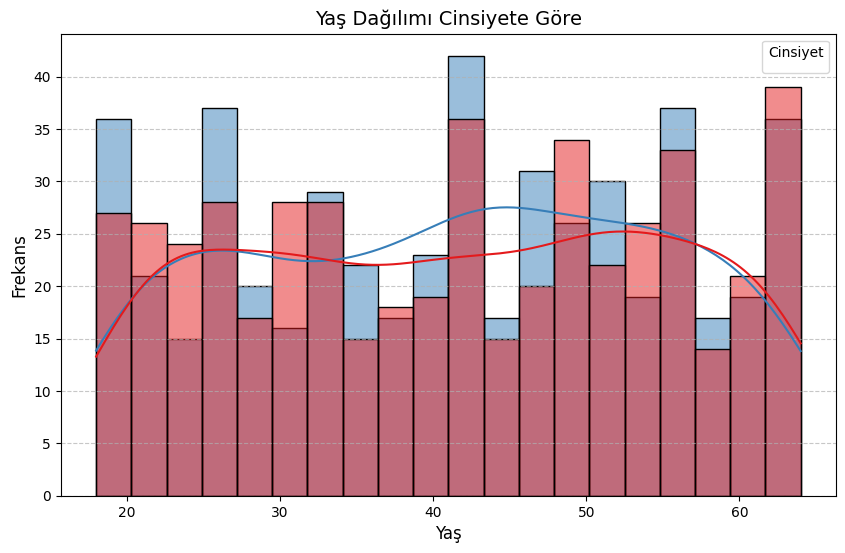

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gender_age_hist():
    # Eksik veya sonsuz değerleri temizliyoruz
    df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
    df.dropna(subset=['Age', 'Gender'], inplace=True)

    # Yaş verilerinin sayısal olup olmadığını kontrol ediyoruz
    if not pd.api.types.is_numeric_dtype(df['Age']):
        print("Yaş sütunu sayısal değil. Lütfen veriyi kontrol edin.")
        return
    
    # Grafik boyutunu ayarlıyoruz
    plt.figure(figsize=(10, 6))
    
    # Yaş verilerini cinsiyete göre gruplayıp histogram çiziyoruz
    sns.histplot(data=df, x="Age", hue="Gender", kde=True, bins=20, palette="Set1")
    
    # Grafik başlığı ve eksen isimlerini belirliyoruz
    plt.title("Yaş Dağılımı Cinsiyete Göre", fontsize=14)
    plt.xlabel("Yaş", fontsize=12)
    plt.ylabel("Frekans", fontsize=12)
    
    # Ek açıklamalar ekleyebiliriz
    plt.legend(title="Cinsiyet", loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Grafiği görüntülüyoruz
    plt.show()

# Kullanım:
plot_gender_age_hist()


In [142]:
def plot_hist(variable):
    # Histogram için grafik boyutunu belirliyoruz (X ekseni 9 birim, Y ekseni 5 birim).
    plt.figure(figsize = (9,5)) 
    
    # Verinin histogramını çiziyoruz. 'variable' parametresi üzerinden, seçilen sütunun histogramını oluşturuyoruz.
    # 'bins = 10' ifadesi, histogramı 10 eşit aralığa böler.
    plt.hist(df[variable], bins = 10, color='skyblue', edgecolor='black') 
    
    # X eksenine, hangi değişkenin görselleştirildiğini belirten bir etiket ekliyoruz.
    plt.xlabel(variable)
    
    # Y eksenine "Frequency" (Frekans) etiketini ekliyoruz, çünkü bu eksen her binin (aralığın) frekansını gösteriyor.
    plt.ylabel("Frequency")
    
    # Grafik başlığını, 'variable' parametresi ile dinamically oluşturuyoruz.
    plt.title("{} Hist Dagilimi".format(variable))
    
    # Histogramı görselleştiriyoruz, grafiği ekranda gösteriyoruz.
    plt.show()


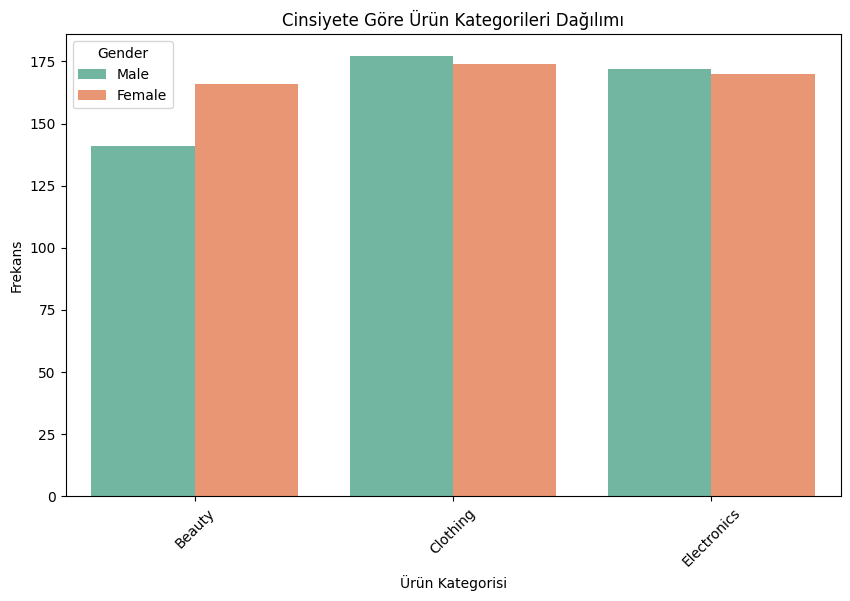

In [143]:
# Cinsiyete göre ürün kategorilerinin dağılımı
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Product Category', hue='Gender', palette='Set2')
plt.title("Cinsiyete Göre Ürün Kategorileri Dağılımı")
plt.xlabel("Ürün Kategorisi")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.show()


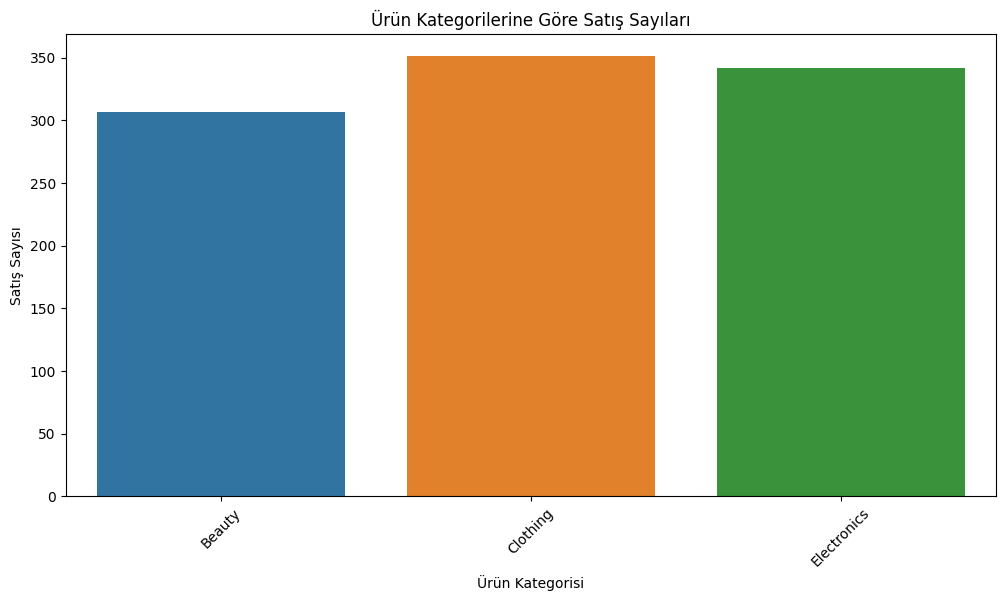

In [144]:
plt.figure(figsize=(12, 6))  # Grafik boyutları ayarlanıyor
sns.countplot(x='Product Category', data=df)  # Ürün kategorisine göre satış sayısını gösteren barplot
plt.title('Ürün Kategorilerine Göre Satış Sayıları')  # Başlık ekleniyor
plt.xlabel('Ürün Kategorisi')  # X eksenine ürün kategorisi etiketi
plt.ylabel('Satış Sayısı')  # Y eksenine satış sayısı etiketi
plt.xticks(rotation=45)  # X eksenindeki etiketleri 45 derece döndürerek okunabilirliği artırıyoruz
plt.show()  # Grafik gösterimi


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

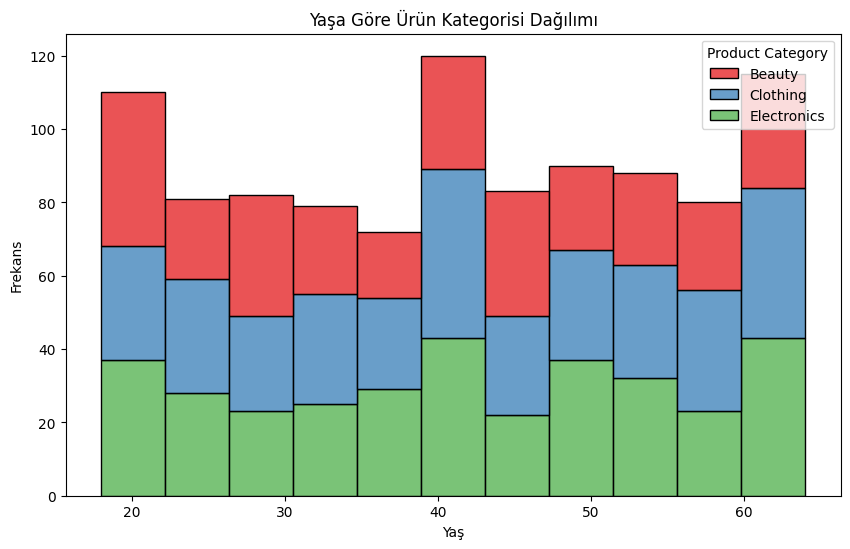

In [145]:
# Yaşa göre ürün kategorilerinin dağılımı
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Product Category', multiple="stack", palette='Set1')
plt.title("Yaşa Göre Ürün Kategorisi Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()


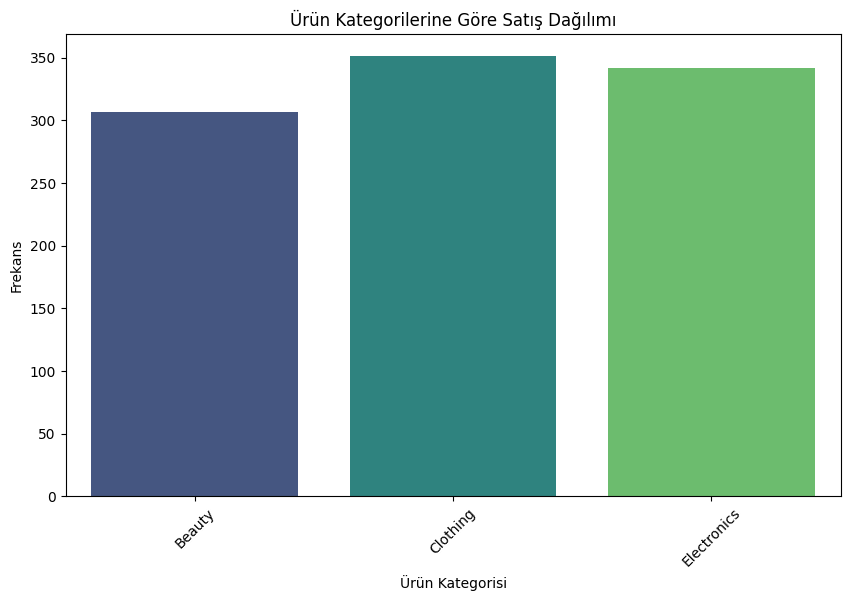

In [146]:
# Ürün kategorilerinin popülerliği
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Product Category', palette='viridis')
plt.title("Ürün Kategorilerine Göre Satış Dağılımı")
plt.xlabel("Ürün Kategorisi")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.show()


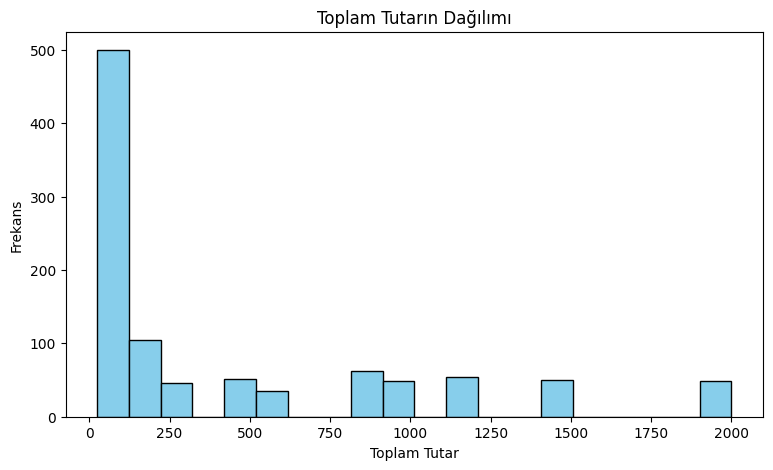

In [147]:
# Toplam tutarın dağılımı
plt.figure(figsize=(9,5))
plt.hist(df['Total Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title("Toplam Tutarın Dağılımı")
plt.xlabel("Toplam Tutar")
plt.ylabel("Frekans")
plt.show()


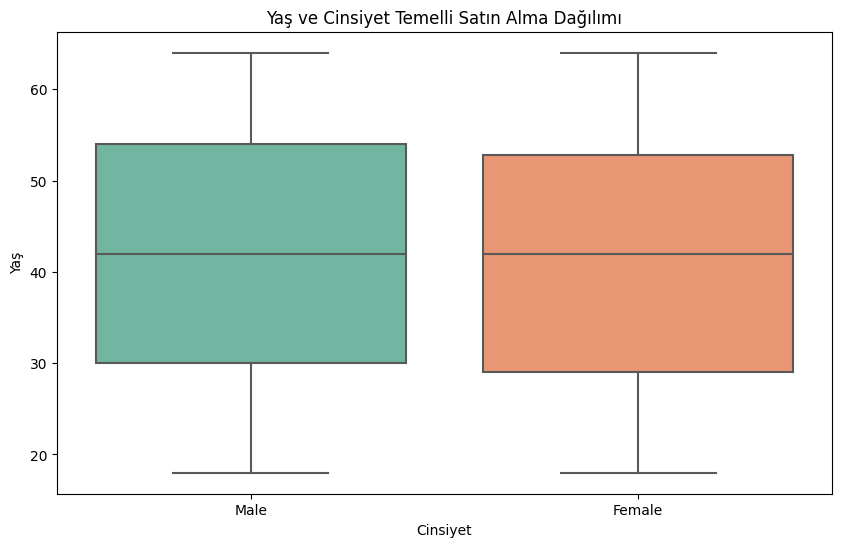

In [148]:
# Yaş ve cinsiyet temelli satın alma dağılımı
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Gender', y='Age', palette='Set2')
plt.title("Yaş ve Cinsiyet Temelli Satın Alma Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yaş")
plt.show()


/tmp/ipykernel_30/3655177847.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



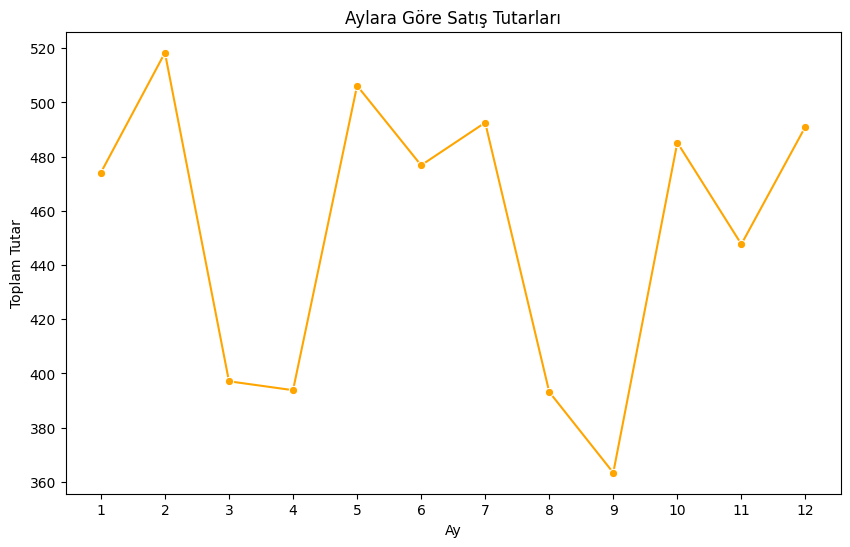

In [150]:
# Tarihe göre toplam tutarın dağılımı
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Month', y='Total Amount', ci=None, marker='o', color='orange')
plt.title("Aylara Göre Satış Tutarları")
plt.xlabel("Ay")
plt.ylabel("Toplam Tutar")
plt.xticks(range(1, 13))
plt.show()


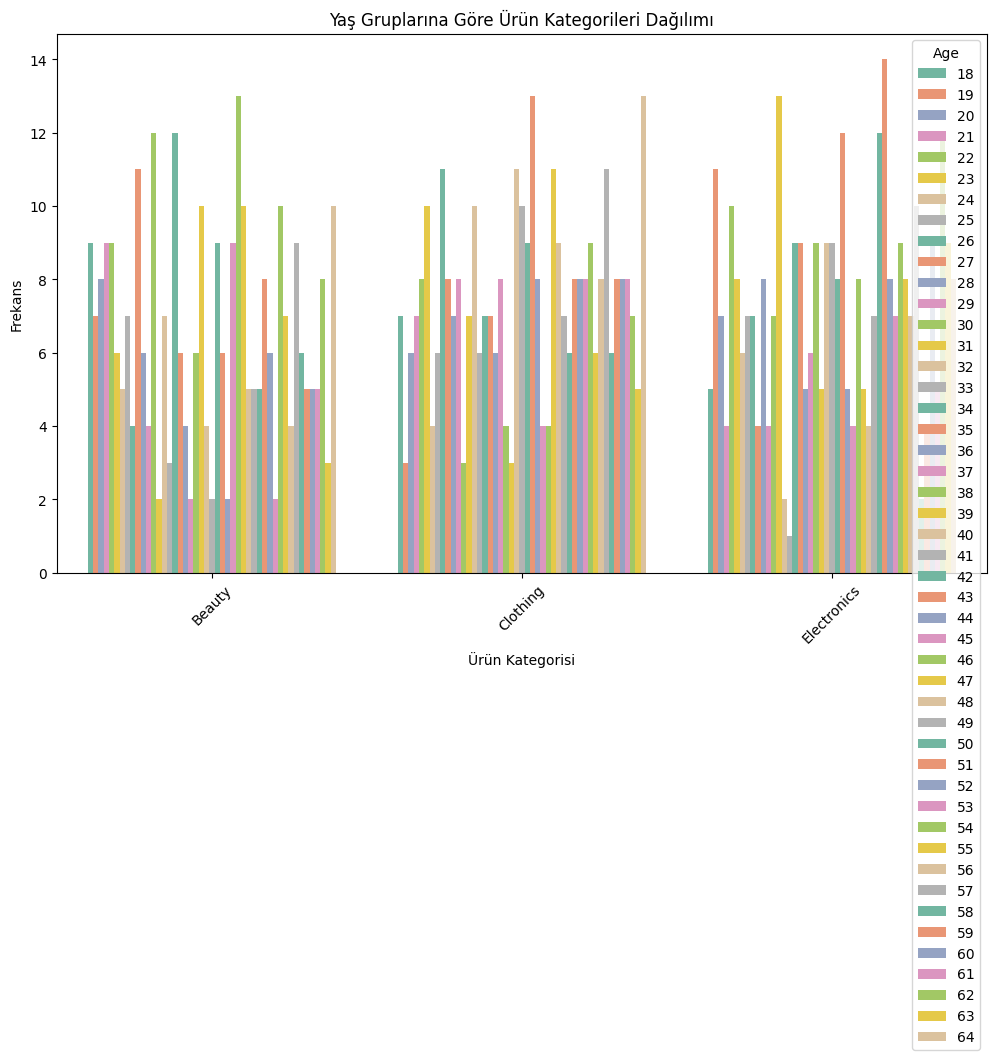

In [156]:
# Yaşa göre ürün kategorilerinin dağılımı
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='Product Category', hue='Age', palette='Set2')
plt.title("Yaş Gruplarına Göre Ürün Kategorileri Dağılımı")
plt.xlabel("Ürün Kategorisi")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.show()


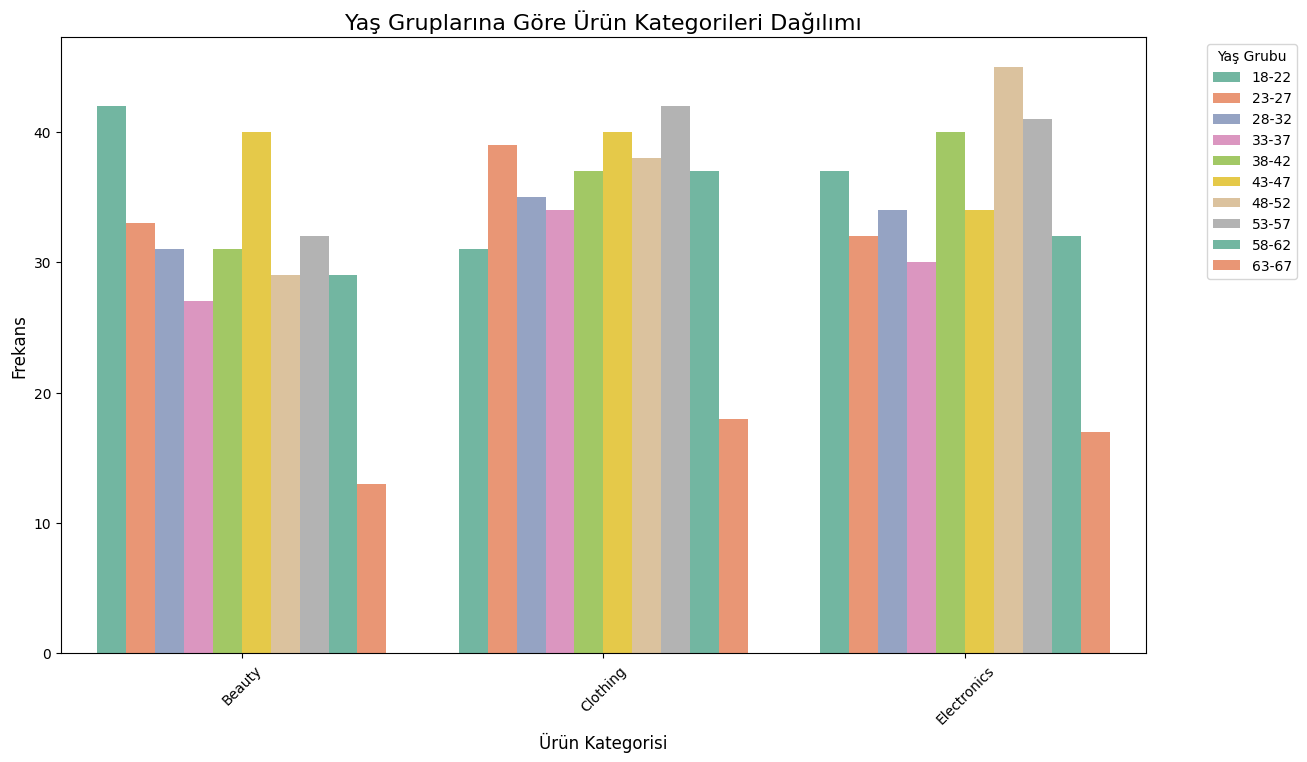

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mevcut yaş aralıklarına uygun gruplama
bins = range(df['Age'].min(), df['Age'].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Yaş gruplarına göre ürün kategorilerinin dağılımı
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Product Category', hue='Age Group', palette='Set2')

# Grafik detaylarını düzenleme
plt.title("Yaş Gruplarına Göre Ürün Kategorileri Dağılımı", fontsize=16)
plt.xlabel("Ürün Kategorisi", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Yaş Grubu", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



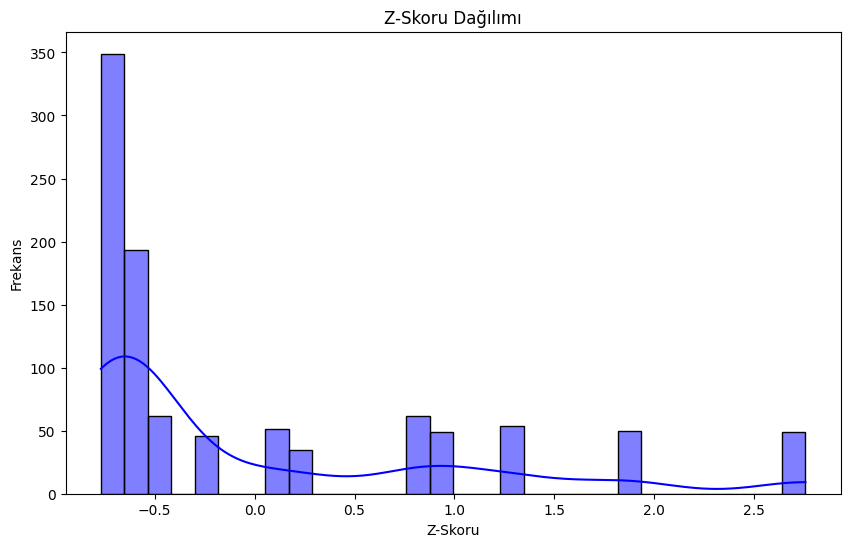

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
df = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")

# Değişkenin Z-skorunu hesaplayalım (örneğin, 'Total Amount')
df['Z-Score'] = (df['Total Amount'] - df['Total Amount'].mean()) / df['Total Amount'].std()

# Z-skorlarının dağılımını görselleştirelim
plt.figure(figsize=(10,6))
sns.histplot(df['Z-Score'], bins=30, kde=True, color='blue')
plt.title('Z-Skoru Dağılımı')
plt.xlabel('Z-Skoru')
plt.ylabel('Frekans')
plt.show()


In [161]:
df.columns[df.isnull().any()] #Eksik deger olup olmadigini kontrol edecegiz.

Index([], dtype='object')

In [162]:
df.isnull().sum() #Eksik deger olup olmadigini tespit ediyoruz.

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Z-Score             0
dtype: int64

In [163]:
df['Product Category'].unique()  # 'Product Category' sütununda hangi benzersiz kategorilerin yer aldığını görmek için


array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [164]:
df['Product Category'].nunique()  # Benzersiz kategori sayısını verir.


3

In [165]:
import numpy as np

# Satır sayısına göre rastgele bir index seçiyoruz.
random_indices = np.random.choice(df.index, size=5, replace=False)

# Belirli sütunlarda eksik değerler (NaN) ekliyoruz.
df.loc[random_indices, 'Gender'] = np.nan
df.loc[random_indices, 'Age'] = np.nan
df.loc[random_indices, 'Total Amount'] = np.nan

# Artık df, bazı NaN (eksik) değerler içeriyor
print(df.isnull().sum())  # NaN değerlerin sayısını kontrol etmek için


Transaction ID      0
Date                0
Customer ID         0
Gender              5
Age                 5
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        5
Z-Score             0
dtype: int64


In [71]:
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Z-Score             0
dtype: int64

In [166]:
import numpy as np

# Satır sayısına göre rastgele bir index seçiyoruz.
random_indices = np.random.choice(df.index, size=5, replace=False)

# Belirli sütunlarda eksik değerler (NaN) ekliyoruz.
df.loc[random_indices, 'Gender'] = np.nan
df.loc[random_indices, 'Age'] = np.nan
df.loc[random_indices, 'Total Amount'] = np.nan

# Artık df, bazı NaN (eksik) değerler içeriyor
print(df.isnull().sum())  # NaN değerlerin sayısını kontrol etmek için


Transaction ID       0
Date                 0
Customer ID          0
Gender              10
Age                 10
Product Category     0
Quantity             0
Price per Unit       0
Total Amount        10
Z-Score              0
dtype: int64


In [168]:
# Eksik değerleri ortalama ile doldurma
df['Age'] = df['Age'].fillna(df['Age'].mean())

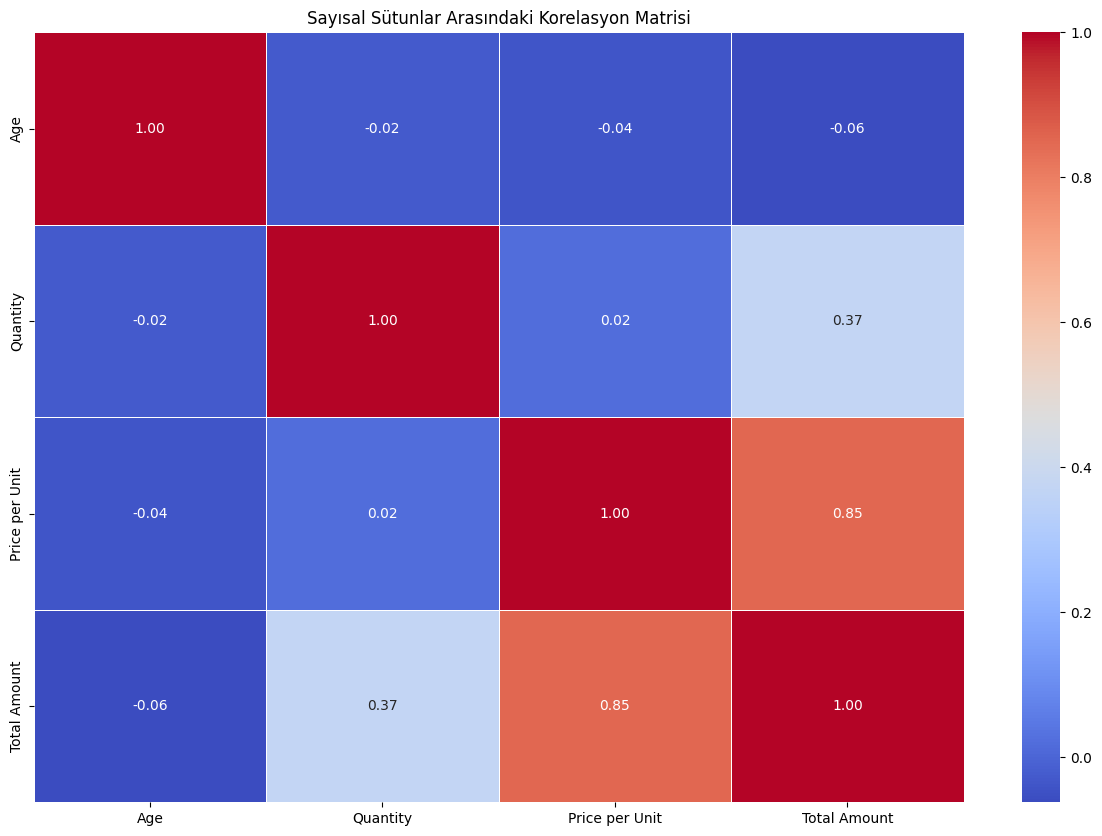

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunları seçiyoruz: 'Age', 'Quantity', 'Price per Unit', 'Total Amount', vb.
numeric_df = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

# Korelasyon matrisini hesaplıyoruz
corr_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştiriyoruz
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Sayısal Sütunlar Arasındaki Korelasyon Matrisi')
plt.show()


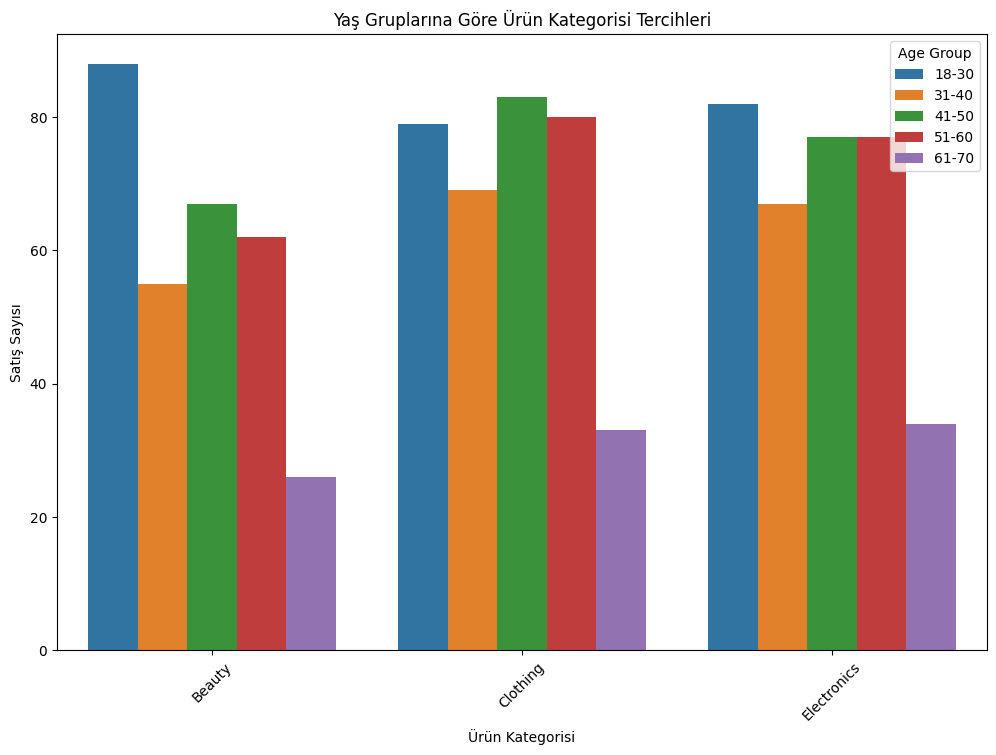

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yaş gruplarına göre ürün kategorilerinin dağılımı
plt.figure(figsize=(12, 8))

# Yaş grupları oluşturuluyor
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Yaş gruplarına göre ürün kategorilerini sayma ve görselleştirme
sns.countplot(x='Product Category', hue='Age Group', data=df)
plt.title('Yaş Gruplarına Göre Ürün Kategorisi Tercihleri')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_30/297097990.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



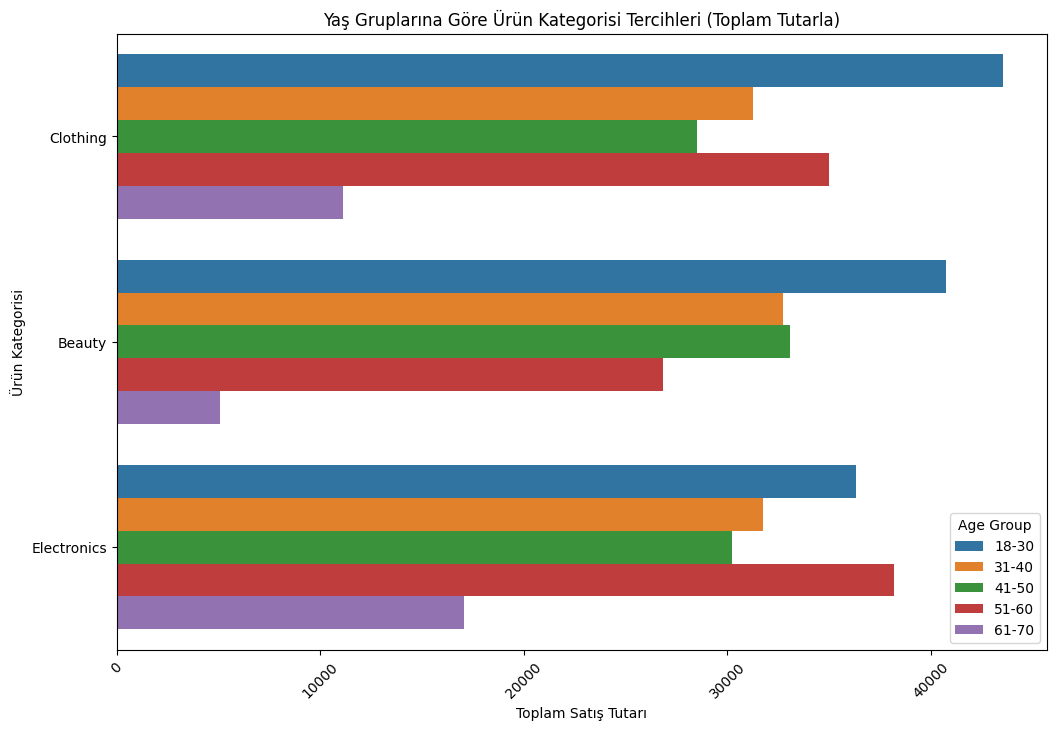

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Yaş gruplarına göre ürün kategorilerinin dağılımı
plt.figure(figsize=(12, 8))

# Yaş grupları oluşturuluyor
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# 'Product Category' ve 'Age Group' için Total Amount toplamlarını hesapla
category_age_total = df.groupby(['Product Category', 'Age Group'])['Total Amount'].sum().reset_index()

# Total Amount'a göre büyükten küçüğe sıralama yap
category_age_total = category_age_total.sort_values(by='Total Amount', ascending=False)

# Yaş gruplarına göre ürün kategorilerini sayma ve görselleştirme
sns.barplot(x='Total Amount', y='Product Category', hue='Age Group', data=category_age_total)
plt.title('Yaş Gruplarına Göre Ürün Kategorisi Tercihleri (Toplam Tutarla)')
plt.xlabel('Toplam Satış Tutarı')
plt.ylabel('Ürün Kategorisi')
plt.xticks(rotation=45)
plt.show()


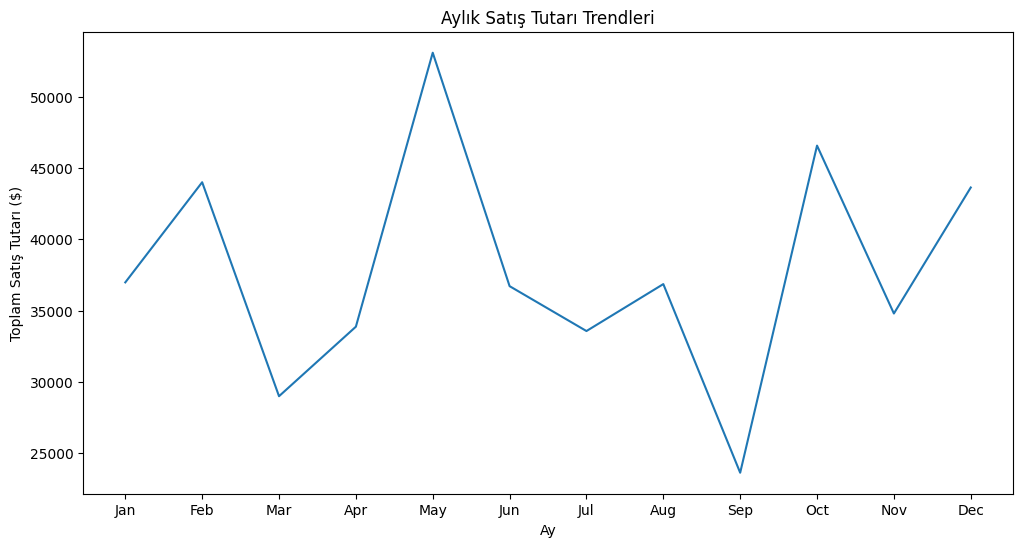

In [172]:
# Date sütununu datetime formatına çeviriyoruz
df['Date'] = pd.to_datetime(df['Date'])

# Satışların tarihsel trende göre toplam tutarını görselleştirelim
plt.figure(figsize=(12,6))
df.groupby(df['Date'].dt.month)['Total Amount'].sum().plot(kind='line')  # Aylık bazda toplam tutar
plt.title('Aylık Satış Tutarı Trendleri')  # Başlık
plt.xlabel('Ay')  # X ekseni etiketi
plt.ylabel('Toplam Satış Tutarı ($)')  # Y ekseni etiketi
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Ay isimleri
plt.show()


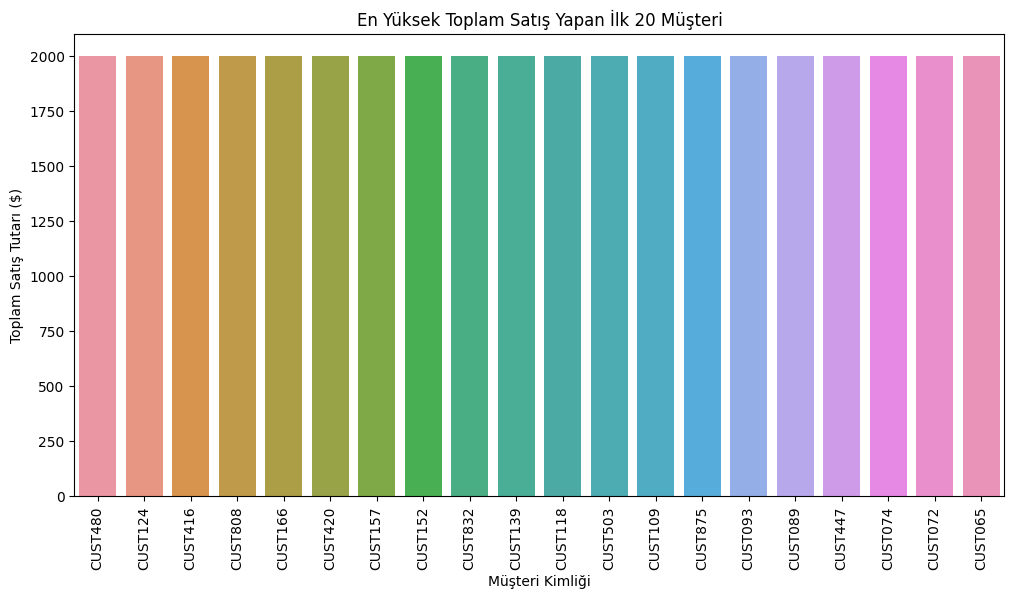

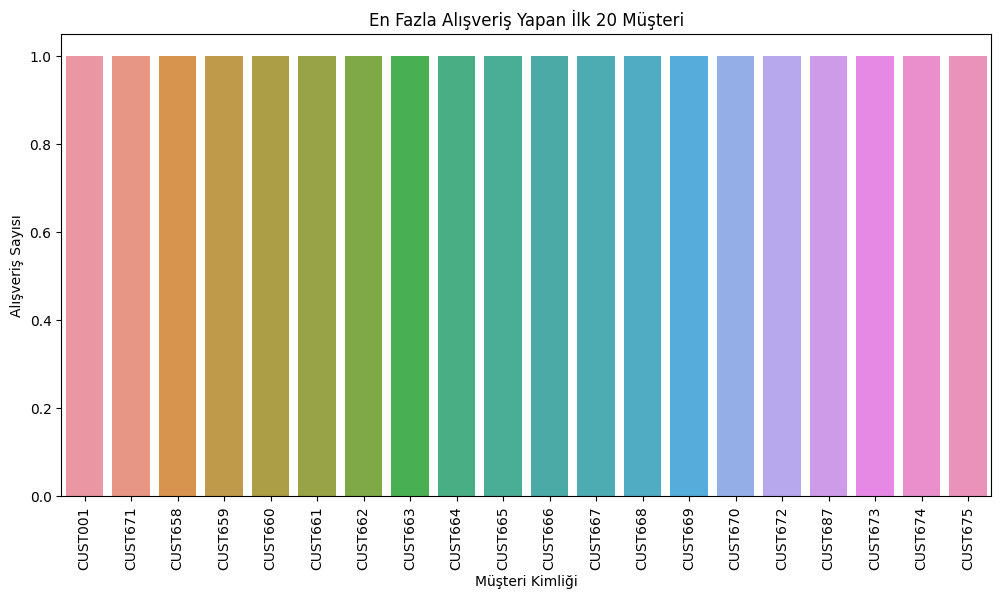

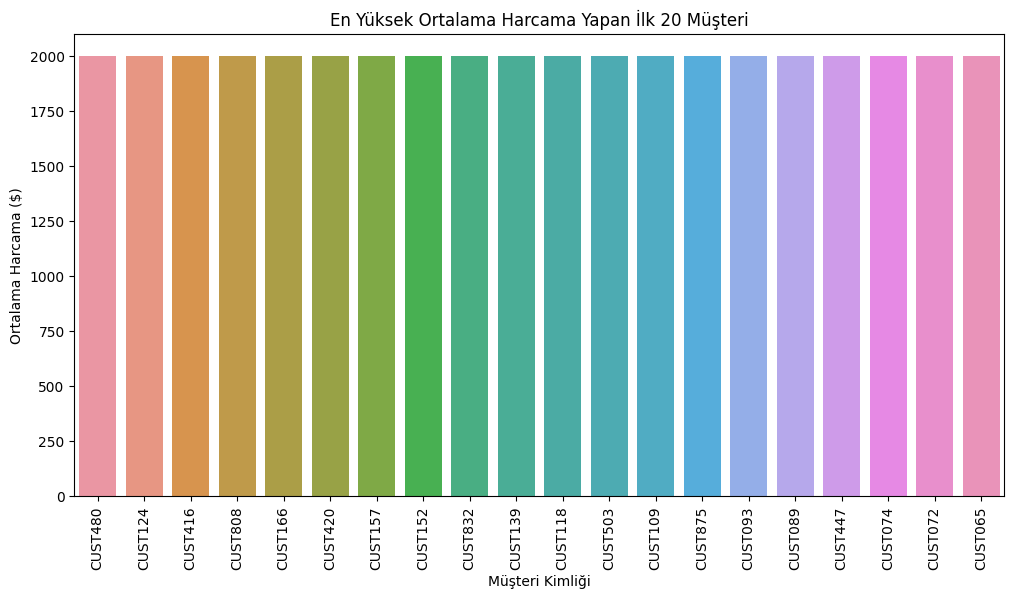

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Müşteri başına toplam satış tutarını hesapla
customer_sales = df.groupby('Customer ID')['Total Amount'].sum().reset_index()

# Müşteri başına alışveriş sayısını hesapla
customer_transactions = df.groupby('Customer ID').size().reset_index(name='Transaction Count')

# Müşteri başına ortalama harcamayı hesapla
customer_sales['Average Spend'] = customer_sales['Total Amount'] / customer_transactions['Transaction Count']

# Grafik 1: Müşteri başına toplam satış tutarını görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Total Amount', data=customer_sales.sort_values('Total Amount', ascending=False).head(20))
plt.xticks(rotation=90)
plt.title('En Yüksek Toplam Satış Yapan İlk 20 Müşteri')
plt.xlabel('Müşteri Kimliği')
plt.ylabel('Toplam Satış Tutarı ($)')
plt.show()  # Grafik gösterimi burada doğru şekilde kapatılıyor

# Grafik 2: Müşteri başına alışveriş sayısını görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Transaction Count', data=customer_transactions.sort_values('Transaction Count', ascending=False).head(20))
plt.xticks(rotation=90)
plt.title('En Fazla Alışveriş Yapan İlk 20 Müşteri')
plt.xlabel('Müşteri Kimliği')
plt.ylabel('Alışveriş Sayısı')
plt.show()  # Grafik gösterimi burada doğru şekilde kapatılıyor

# Grafik 3: Müşteri başına ortalama harcamayı görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Average Spend', data=customer_sales.sort_values('Average Spend', ascending=False).head(20))
plt.xticks(rotation=90)
plt.title('En Yüksek Ortalama Harcama Yapan İlk 20 Müşteri')
plt.xlabel('Müşteri Kimliği')
plt.ylabel('Ortalama Harcama ($)')
plt.show()  # Grafik gösterimi burada doğru şekilde kapatılıyor


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



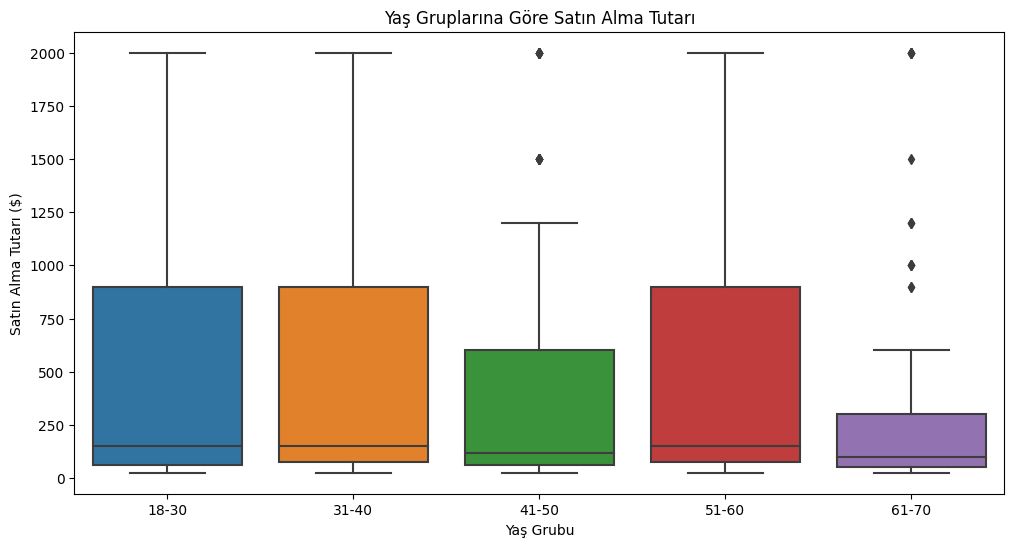

In [173]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Total Amount', data=df)  # Yaş gruplarına göre satın alma tutarını gösteren boxplot
plt.title('Yaş Gruplarına Göre Satın Alma Tutarı')  # Başlık ekleniyor
plt.xlabel('Yaş Grubu')  # X ekseni için yaş grubu etiketi
plt.ylabel('Satın Alma Tutarı ($)')  # Y ekseni için satın alma tutarı etiketi
plt.show()  # Grafik gösterimi
